# SPIRE-NEP master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix,
                                              quick_checks)

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_spire-nep_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_spire-nep_20180220.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

Table shows only problematic columns.


/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(40, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(40, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


idx,Column,All nan,#Measurements,#Zeros,#Negative,Minimum value
0,ferr_ap_gpc1_g,False,2443,3,0,0.0
1,merr_ap_gpc1_g,False,2443,3,0,0.0
2,ferr_gpc1_g,False,2459,8,0,0.0
3,merr_gpc1_g,False,2459,8,0,0.0
4,ferr_ap_gpc1_i,False,2609,1,0,0.0
5,merr_ap_gpc1_i,False,2609,1,0,0.0
6,ferr_gpc1_i,False,2618,2,0,0.0
7,merr_gpc1_i,False,2618,2,0,0.0
8,ferr_ap_gpc1_z,False,2591,5,0,0.0
9,merr_ap_gpc1_z,False,2591,5,0,0.0


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [6]:
u_bands = []
g_bands = [ "GPC1 g"]
r_bands = [ "GPC1 r"]
i_bands = [ "GPC1 i"]
z_bands = [ "GPC1 z"]
y_bands = [ "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


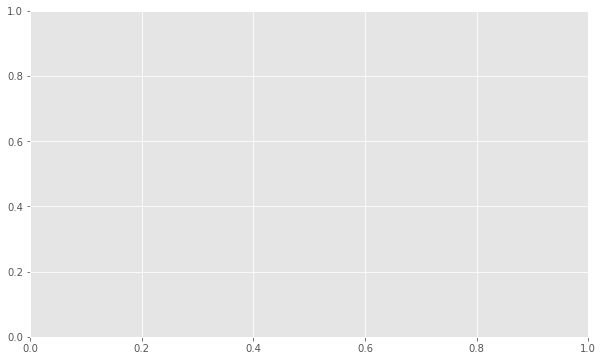

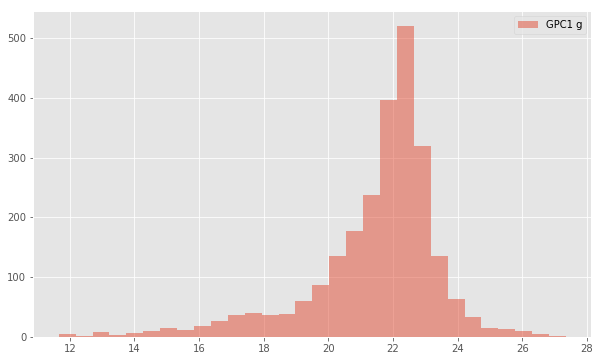

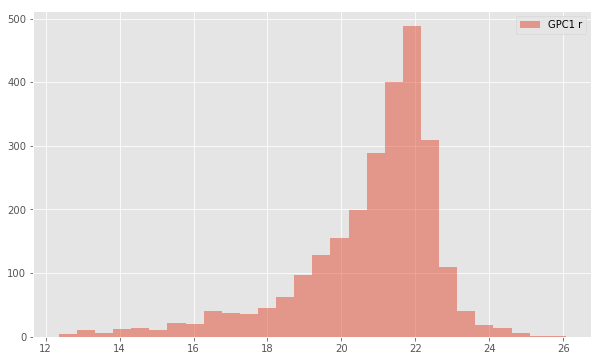

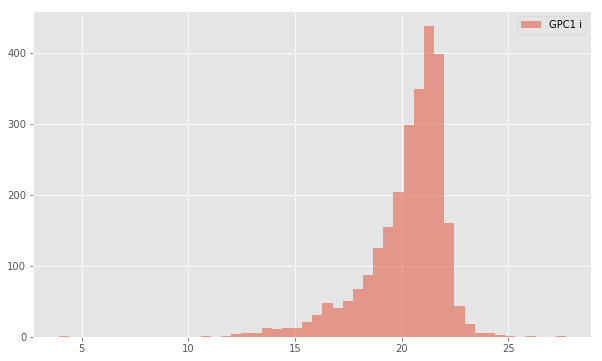

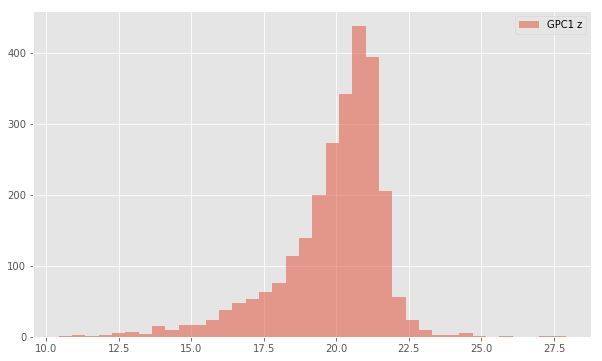

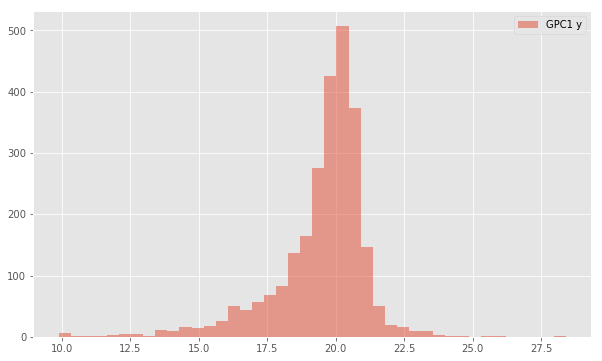

In [7]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

In [8]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS to compare magnitudes.

In [9]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [10]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_SPIRE-NEP.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.51
- Median Absolute Deviation: 0.23
- 1% percentile: -2.928476228713989
- 99% percentile: 1.917575302124025


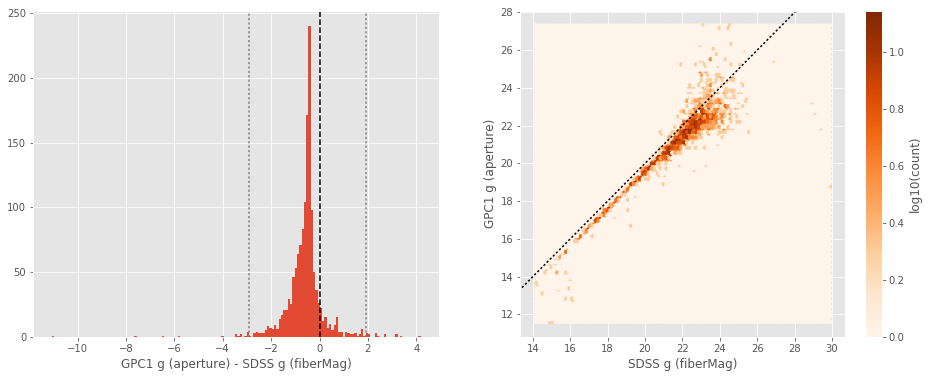

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.51
- Median Absolute Deviation: 0.23
- 1% percentile: -2.928476228713989
- 99% percentile: 1.917575302124025


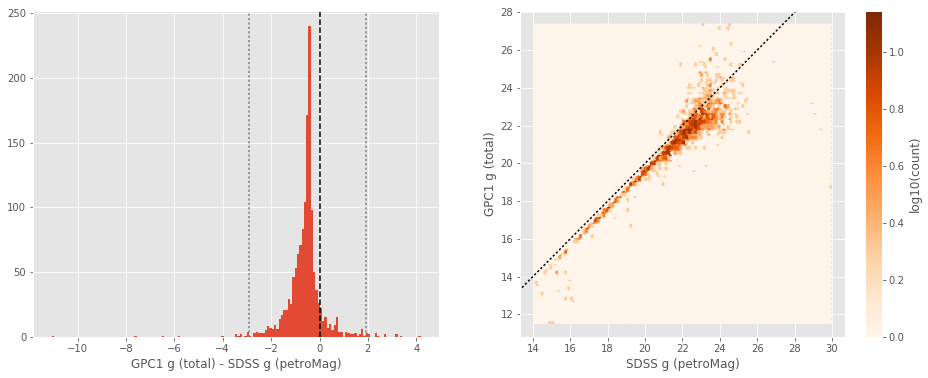

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.12
- 1% percentile: -1.6758414459228517
- 99% percentile: 0.773529739379882


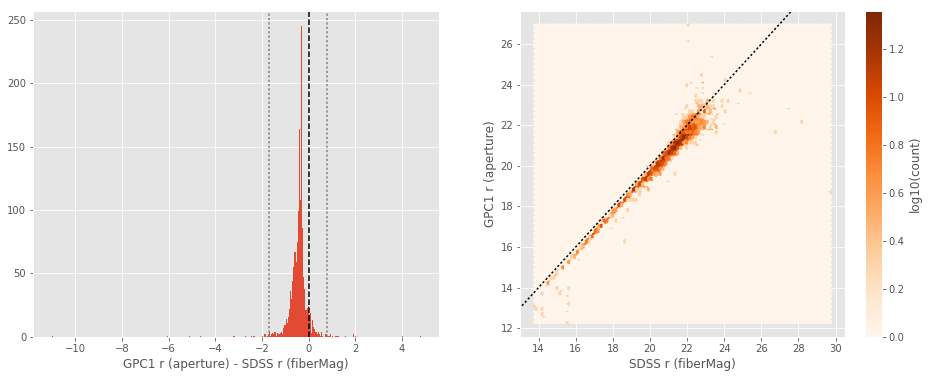

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.38
- Median Absolute Deviation: 0.12
- 1% percentile: -1.6758414459228517
- 99% percentile: 0.773529739379882


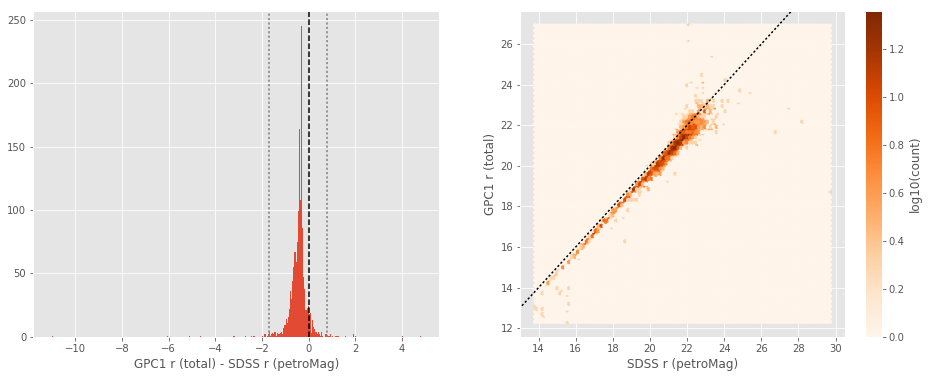

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.33
- Median Absolute Deviation: 0.09
- 1% percentile: -2.1108423233032223
- 99% percentile: 0.45564216613769587


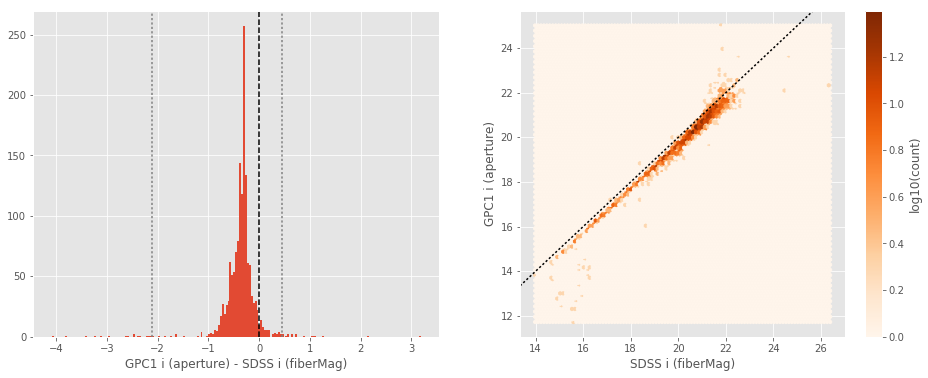

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.33
- Median Absolute Deviation: 0.09
- 1% percentile: -2.1108423233032223
- 99% percentile: 0.45564216613769587


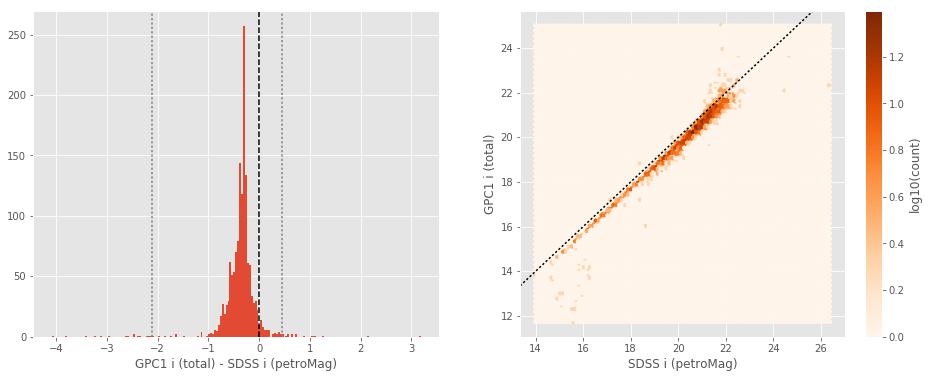

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.28
- Median Absolute Deviation: 0.14
- 1% percentile: -1.4216452217102051
- 99% percentile: 1.2256657981872567


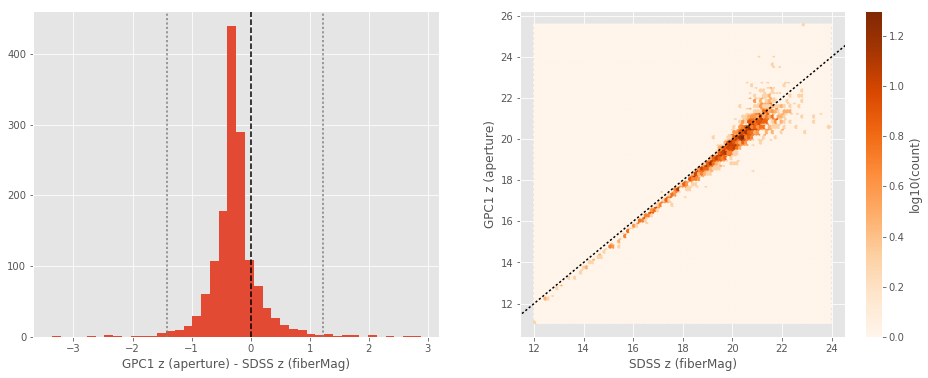

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.28
- Median Absolute Deviation: 0.14
- 1% percentile: -1.4216452217102051
- 99% percentile: 1.2256657981872567


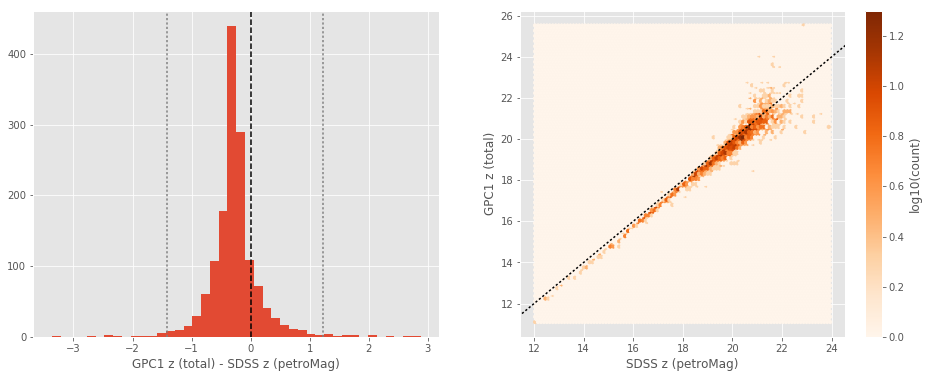

In [11]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 2555 / 2674 (95.55%)


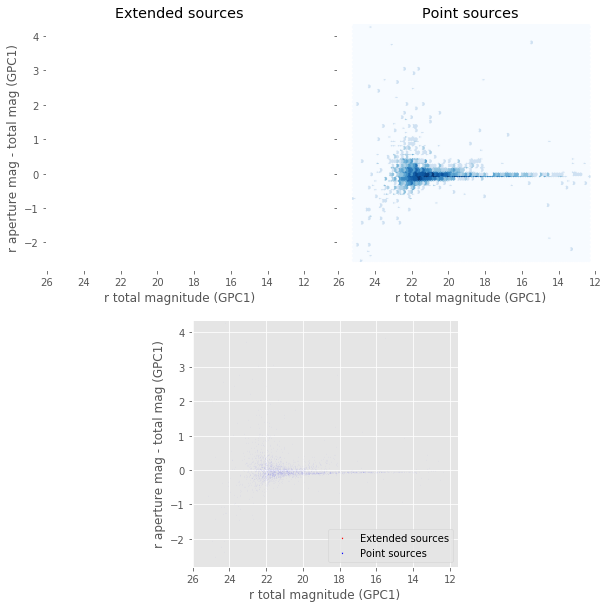

In [12]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (GPC1)", "r aperture mag - total mag (GPC1)",
    np.full(len(master_catalogue), 1.),
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 2284 / 2674 (85.42%)


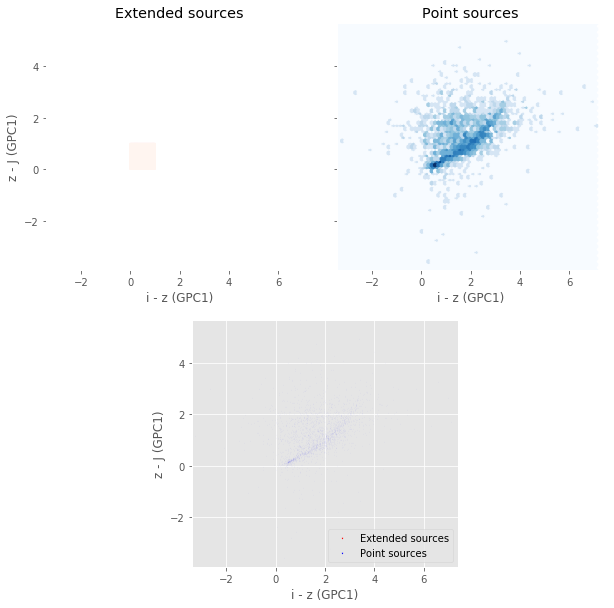

In [13]:
nb_ccplots(
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_gpc1_r'] - master_catalogue['m_gpc1_y'],
    "i - z (GPC1)", "z - J (GPC1)",
    np.full(len(master_catalogue), 1.)
) #No stellarity in panstarrs so use all sources